#Bibliotheken / Libraries

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import random

from tensorflow import keras
from keras import layers
from keras import Model
from keras.preprocessing.image import ImageDataGenerator
import cv2
from cv2 import imread
from google.colab.patches import cv2_imshow
from google.colab import files
from cv2 import rectangle

import os
from os import listdir

In [ ]:
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model

In [ ]:
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint, EarlyStopping


# Gesichtsdetektion / Face Detection

In [ ]:
face_cascade= cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_alt2.xml'))
pixels = cv2.imread('/content/drive/MyDrive/jdc/Bildgestutzte/fotos/7.jpg')
bboxes = face_cascade.detectMultiScale(pixels)
for box in bboxes:
    print(box)

[224 823 846 846]


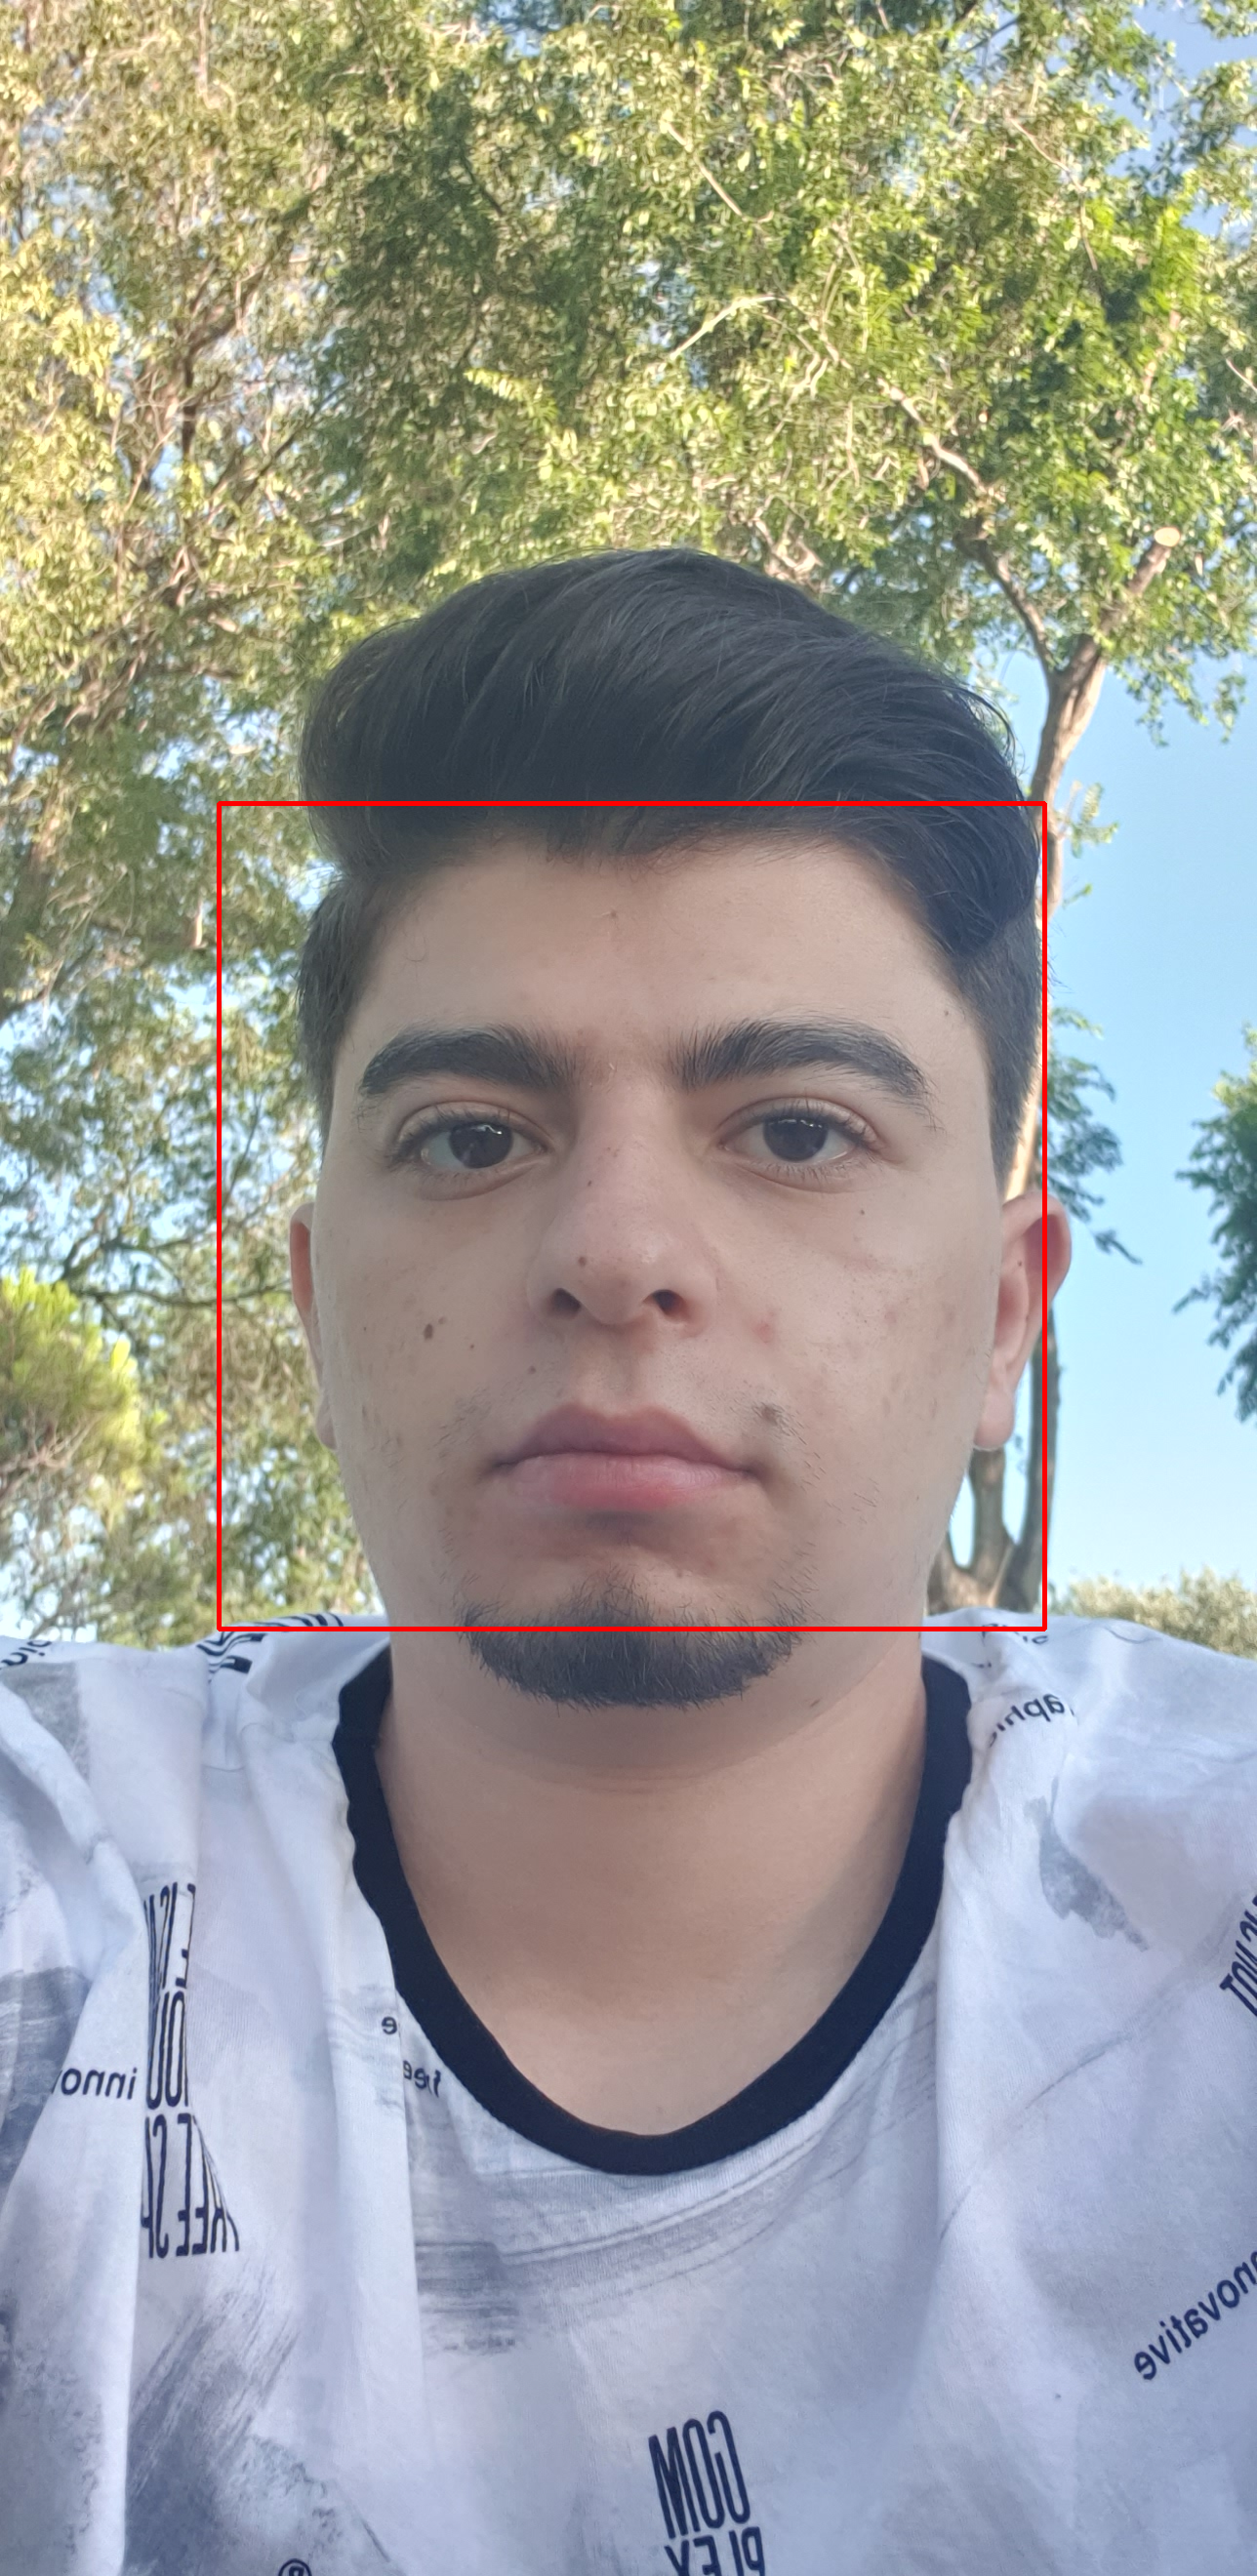

number of detected faces : 1


In [ ]:
for box in bboxes:
    
    x, y, width, height = box
    x2, y2 = x + width, y + height
    
    rectangle(pixels, (x, y), (x2, y2), (0,0,255), 4)
   
cv2_imshow(pixels),
#display(pixels),
print( 'number of detected faces :' ,len(bboxes))

In [ ]:
def resize(img):
   print('Original Dimensions : ',img.shape)
   scale_percent = 60 
   width = int(img.shape[1] * scale_percent / 300)
   height = int(img.shape[0] * scale_percent / 300)
   dim = (width, height)
   
   resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    
   print('Resized Dimensions : ',resized.shape)
    
   #cv2_imshow(resized)
   
   #cv2.waitKey(0)
   #cv2.destroyAllWindows()
   return resized

#Datenaufbereitung/ Data preparation

In [ ]:
# data preparation

train_dir = '/content/drive/MyDrive/jdc/Bildgestutzte/Dataset/Training/Training'
test_dir = '/content/drive/MyDrive/jdc/Bildgestutzte/Dataset/Testing/Testing'

train_angry_dir = '/content/drive/MyDrive/jdc/Bildgestutzte/Dataset/Training/Training/Angry'
train_happy_dir = '/content/drive/MyDrive/jdc/Bildgestutzte/Dataset/Training/Training/Happy'
train_sad_dir = '/content/drive/MyDrive/jdc/Bildgestutzte/Dataset/Training/Training/Sad'

test_angry_dir = '/content/drive/MyDrive/jdc/Bildgestutzte/Dataset/Testing/Testing/Angry'
test_happy_dir = '/content/drive/MyDrive/jdc/Bildgestutzte/Dataset/Testing/Testing/Happy'
test_sad_dir = '/content/drive/MyDrive/jdc/Bildgestutzte/Dataset/Testing/Testing/Sad'

dir_list = [train_angry_dir, train_happy_dir,train_sad_dir, 
            test_angry_dir, test_happy_dir, test_sad_dir]

for d in dir_list:
    print(d, len(os.listdir(d)))

/content/drive/MyDrive/jdc/Bildgestutzte/Dataset/Training/Training/Angry 3995
/content/drive/MyDrive/jdc/Bildgestutzte/Dataset/Training/Training/Happy 7215
/content/drive/MyDrive/jdc/Bildgestutzte/Dataset/Training/Training/Sad 4830
/content/drive/MyDrive/jdc/Bildgestutzte/Dataset/Testing/Testing/Angry 958
/content/drive/MyDrive/jdc/Bildgestutzte/Dataset/Testing/Testing/Happy 1774
/content/drive/MyDrive/jdc/Bildgestutzte/Dataset/Testing/Testing/Sad 1247


#Datenerweiterung/ Data Augmentation

In [ ]:
# image generator

train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                  rotation_range=2.5,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  zoom_range=0.1,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=128,
                                                   class_mode='categorical')

validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

validation_generator = validation_datagen.flow_from_directory(test_dir,
                                                             target_size=(150,150),
                                                             batch_size=128,
                                                             class_mode='categorical')

Found 16040 images belonging to 3 classes.
Found 3979 images belonging to 3 classes.


#Aufbau des Modells/ Building the model


In [ ]:
# build the model

model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dense(128, activation='relu'), 
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(3, activation='softmax')  
])


model.compile(optimizer=RMSprop(learning_rate=0.001 ),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

#Trainieren des Modells/ Training The Model

In [ ]:
# callback function

path = r"/content/drive/MyDrive/Model/emo_det_v1.h5"

checkpoint = ModelCheckpoint(path, monitor = "val_loss",
                             mode = "min" ,
                            save_best_only = True , verbose = 1)

earlystop = EarlyStopping (monitor = "val_loss" , min_delta = 0 ,
                           patience = 5 , restore_best_weights = True , 
                           verbose = 1)
callbacks = [earlystop , checkpoint]


In [ ]:
history = model.fit(train_generator,
                   epochs=100,
                   verbose=1,
                   validation_data=validation_generator,
                   callbacks=callbacks)

Epoch 1/100
126/126 [==============================] - ETA: 0s - loss: 1.0951 - accuracy: 0.4488 
Epoch 1: val_loss improved from inf to 1.05242, saving model to /content/drive/MyDrive/Model/emo_det_v1.h5
126/126 [==============================] - 4644s 37s/step - loss: 1.0951 - accuracy: 0.4488 - val_loss: 1.0524 - val_accuracy: 0.4652
Epoch 2/100
126/126 [==============================] - ETA: 0s - loss: 1.0486 - accuracy: 0.4639
Epoch 2: val_loss improved from 1.05242 to 0.99004, saving model to /content/drive/MyDrive/Model/emo_det_v1.h5
126/126 [==============================] - 111s 880ms/step - loss: 1.0486 - accuracy: 0.4639 - val_loss: 0.9900 - val_accuracy: 0.5202
Epoch 3/100
126/126 [==============================] - ETA: 0s - loss: 0.9929 - accuracy: 0.5012
Epoch 3: val_loss improved from 0.99004 to 0.89764, saving model to /content/drive/MyDrive/Model/emo_det_v1.h5
126/126 [==============================] - 110s 872ms/step - loss: 0.9929 - accuracy: 0.5012 - val_loss: 0.897

In [ ]:
# save the model

model.save(path)

#Plotten der Ergebnisse/ Plotting the Results

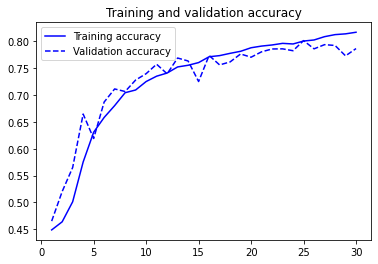

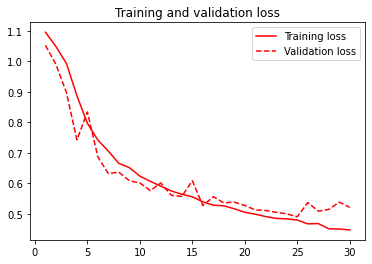

In [ ]:
# plot accuracy and loss


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# accuracy

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'b--', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

# loss

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'r--', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#Laden des Modells/ Loading The Model

In [ ]:
model = load_model(path)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

#Testen/ Testing

In [ ]:
emotion_labels= ['Angry','Happy','Sad']
emotion_labels

['Angry', 'Happy', 'Sad']

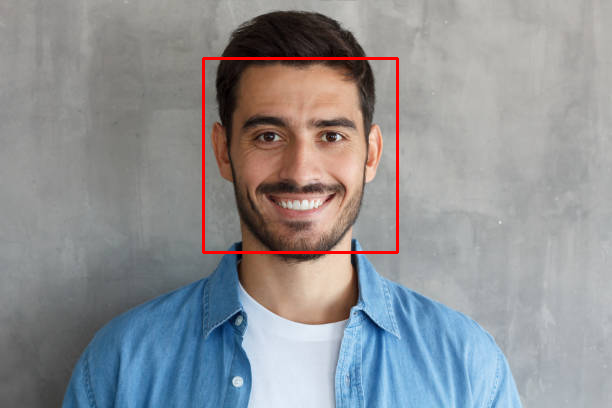

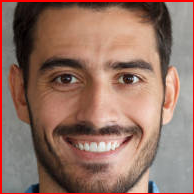

In [ ]:
import cv2
  
img = cv2.imread('/content/drive/MyDrive/tests/happy face.jpg')
  
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
face_cascade= cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_alt2.xml'))
  
faces = face_cascade.detectMultiScale(gray, 1.1, 4)
  
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    faces = img[y:y + h, x:x + w]
    
      
cv2.imwrite('detcted.jpg', img)
cv2_imshow( img)
cv2_imshow(faces)
cv2.imwrite('face.jpg', faces)
cv2.waitKey()

#resize the input image to 150*150
image= faces
def prepareResizedImage(img_path):
  new_img=cv2.resize(image,(150,150))
  new_img = img_to_array(new_img)
  new_img = np.expand_dims(new_img, axis = 0)

  return new_img

In [ ]:
emotion_labels[np.argmax(model.predict(prepareResizedImage(image)))]

'Happy'

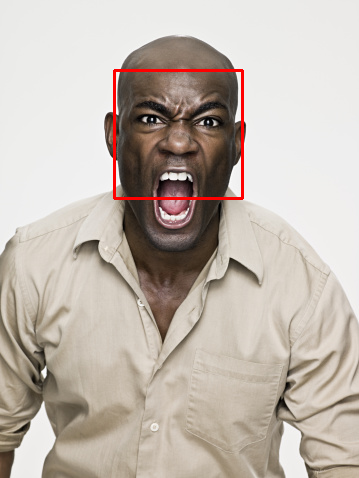

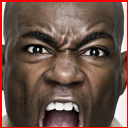

In [ ]:
import cv2
  
img = cv2.imread('/content/drive/MyDrive/tests/angry-man.jpg')
  
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
face_cascade= cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_alt2.xml'))
  
faces = face_cascade.detectMultiScale(gray, 1.1, 4)
  
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    faces = img[y:y + h, x:x + w]
    
      
cv2.imwrite('detcted.jpg', img)
cv2_imshow( img)
cv2_imshow(faces)
cv2.imwrite('face.jpg', faces)
cv2.waitKey()

#resize the input image to 150*150
image= faces
def prepareResizedImage(img_path):
  new_img=cv2.resize(image,(150,150))
  new_img = img_to_array(new_img)
  new_img = np.expand_dims(new_img, axis = 0)

  return new_img

In [ ]:
emotion_labels[np.argmax(model.predict(prepareResizedImage(image)))]

'Angry'

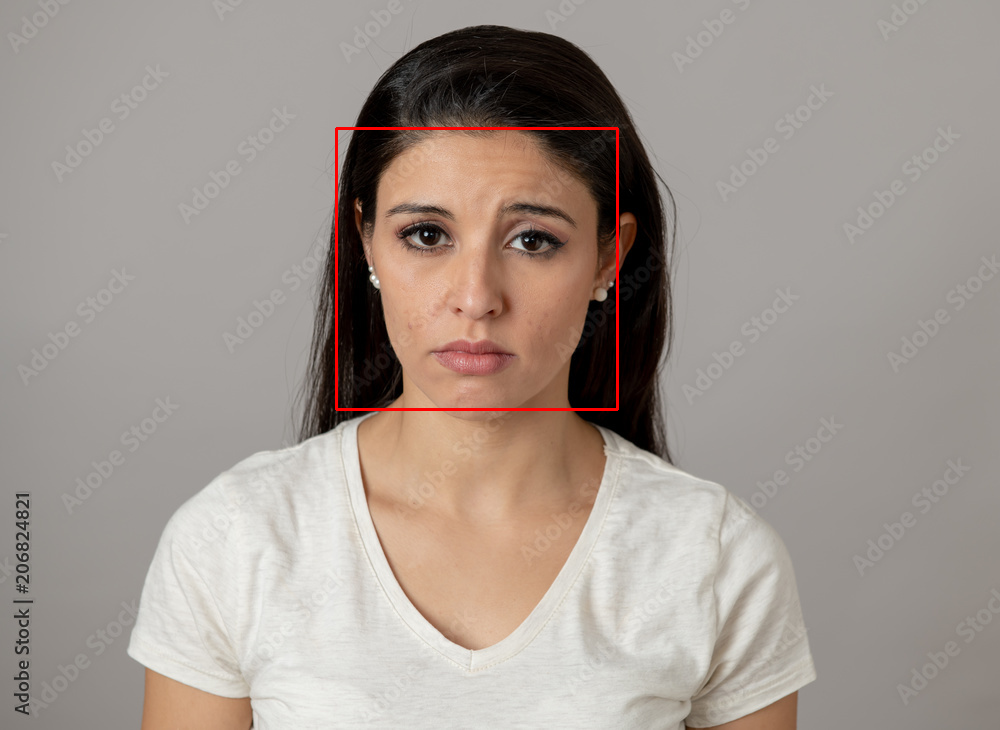

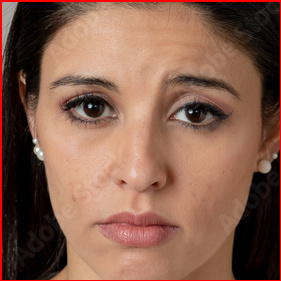

In [ ]:
import cv2
  
img = cv2.imread('/content/drive/MyDrive/tests/sadface.jpg')
  
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
face_cascade= cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_alt2.xml'))
  
faces = face_cascade.detectMultiScale(gray, 1.1, 4)
  
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    faces = img[y:y + h, x:x + w]
    
      
cv2.imwrite('detcted.jpg', img)
cv2_imshow( img)
cv2_imshow(faces)
cv2.imwrite('face.jpg', faces)
cv2.waitKey()

#resize the input image to 150*150
image= faces
def prepareResizedImage(img_path):
  new_img=cv2.resize(image,(150,150))
  new_img = img_to_array(new_img)
  new_img = np.expand_dims(new_img, axis = 0)

  return new_img

In [ ]:
emotion_labels[np.argmax(model.predict(prepareResizedImage(image)))]

'Sad'